In [1]:
import pandas as pd

In [5]:
sms_spam = pd.read_csv("SMSSpamCollection", sep = "\t", header = None, names = ["Label","SMS"])

In [6]:
sms_spam.shape

(5572, 2)

In [7]:
sms_spam.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
sms_spam["Label"].value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [26]:
data_randomized = sms_spam.sample(frac = 1, random_state = 1)

In [28]:
training_test_index = round(len(data_randomized) * 0.8)

In [31]:
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

In [32]:
training_set.shape[0], test_set.shape[0]

(4458, 1114)

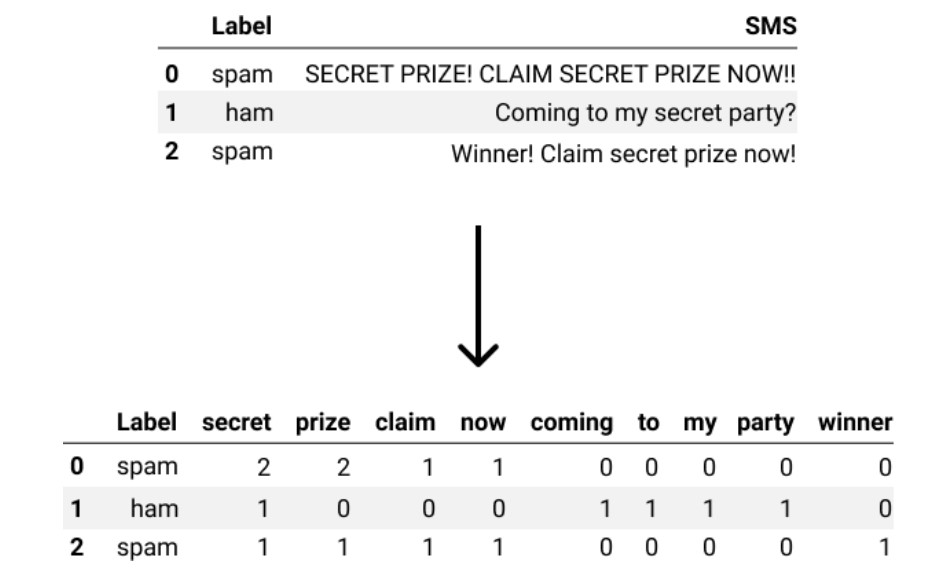

In [33]:
# before cleaning

training_set.head()

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired
3,ham,Havent.
4,ham,I forgot 2 ask ü all smth.. There's a card on ...


In [35]:
# After cleaning

training_set["SMS"] = training_set["SMS"].str.replace("\W"," ").str.lower()
training_set.head()

C:\Users\techm\AppData\Local\Temp\ipykernel_11208\722049661.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  training_set["SMS"] = training_set["SMS"].str.replace("\W"," ").str.lower()


,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...


In [37]:
training_set["SMS"] = training_set["SMS"].str.split()

vocabulary = []

for sms in training_set["SMS"]:
    for word in sms:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))

In [38]:
len(vocabulary)

7783

In [39]:
[0] * 12

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [41]:
# {"yes":[0] * len(training_set)}

In [45]:
word_counts_per_sms = {unique_word: [0] * len(training_set) for unique_word in vocabulary}

In [46]:
len(word_counts_per_sms.keys())

7783

In [49]:
len(word_counts_per_sms["yes"])

4458

In [50]:
training_set["SMS"].head()

0                    [yep, by, the, pretty, sculpture]
1    [yes, princess, are, you, going, to, make, me,...
2                      [welp, apparently, he, retired]
3                                             [havent]
4    [i, forgot, 2, ask, ü, all, smth, there, s, a,...
Name: SMS, dtype: object

In [54]:
word_counts_per_sms["yes"][1] 

0

In [55]:
for index, sms in enumerate(training_set["SMS"]):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [57]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,breather,telephone,becaus,returns,fiend,keris,petey,john,hot,trained,...,lucky,dreams,bulbs,great,logoff,block,late,honest,smidgin,sportsx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
training_set_clean = pd.concat([training_set, word_counts], axis = 1)
training_set_clean.head()

,Label,SMS,breather,telephone,becaus,returns,fiend,keris,petey,john,...,lucky,dreams,bulbs,great,logoff,block,late,honest,smidgin,sportsx
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
training_set_clean["winner"].sum()

13

In [64]:
# Isolating spam and ham message first

spam_messages = training_set_clean[training_set_clean["Label"] == "spam"]
ham_messages = training_set_clean[training_set_clean["Label"] == "ham"]

In [65]:
# P(Spam) and P(Ham)

p_spam = len(spam_messages)/len(training_set_clean)
p_ham = len(ham_messages)/len(training_set_clean)

In [68]:
# N_Spam

n_word_per_spam_message = spam_messages["SMS"].apply(len)
n_spam = n_word_per_spam_message.sum()

n_spam

15190

In [69]:
# N_Ham

n_word_per_ham_message = ham_messages["SMS"].apply(len)
n_ham = n_word_per_ham_message.sum()

n_ham

57237

In [71]:
# N_Vocabulary 

n_vocabulary = len(vocabulary)

# laplace smoothing

alpha = 1

In [72]:
# Initiate Parameters

parameters_spam = {unique_word: 0 for unique_word in vocabulary}
parameters_ham = {unique_word: 0 for unique_word in vocabulary}

In [73]:
spam_messages.head(3)

,Label,SMS,breather,telephone,becaus,returns,fiend,keris,petey,john,...,lucky,dreams,bulbs,great,logoff,block,late,honest,smidgin,sportsx
16,spam,"[freemsg, why, haven, t, you, replied, to, my,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,spam,"[congrats, 2, mobile, 3g, videophones, r, your...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,spam,"[free, message, activate, your, 500, free, tex...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Calculate Paramters

for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum()
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
    parameters_spam[word] = p_word_given_spam
    
    n_word_given_ham = ham_messages[word].sum()
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
    parameters_ham[word] = p_word_given_ham

In [75]:
parameters_ham["yes"]

0.0010150722854506305

In [76]:
parameters_spam["yes"]

0.0007399991294127889

In [77]:
# Classifying a New Message

In [78]:
import re

In [80]:
def classify(message):
    "Message: a string"
    
    message = re.sub("\W"," ", message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
            
    print("P(Spam|message): ", p_spam_given_message)
    print("P(Ham|message): ", p_ham_given_message)
    
    if p_ham_given_message > p_spam_given_message:
        print("Label: Ham")
    elif p_ham_given_message < p_spam_given_message:
        print("Label: Spam")
    else:
        print("Equal Probabilities, have a human classify this!")

In [81]:
classify("WINNER!! This is the secret code to unlock the money : C3214.")

P(Spam|message):  1.3481290211300841e-25
P(Ham|message):  1.9368049028589875e-27
Label: Spam


In [82]:
classify("Sounds good, Ali, then see u there")

P(Spam|message):  1.2186187832944059e-25
P(Ham|message):  3.687530435009238e-21
Label: Ham


In [83]:
def classify_test_set(message):
    "Message: a string"
    
    message = re.sub("\W"," ", message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:f
            p_ham_given_message *= parameters_ham[word]

    
    if p_ham_given_message > p_spam_given_message:
        return "ham"
    elif p_ham_given_message < p_spam_given_message:
        return "spam"
    else:
        return "needs human classification"

In [87]:
test_set["predicted"] = test_set["SMS"].apply(classify_test_set)

In [88]:
test_set

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham
...,...,...,...
1109,ham,"We're all getting worried over here, derek and...",ham
1110,ham,Oh oh... Den muz change plan liao... Go back h...,ham
1111,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...,ham
1112,spam,Text & meet someone sexy today. U can find a d...,spam


In [91]:
correct = 0
total = test_set.shape[0]

for index, row in test_set.iterrows():
    if row["Label"] == row["predicted"]:
        correct += 1

In [92]:
print("Correct: ", correct)
print("Incorrect: ", total - correct)
print("Accuracy: ", correct/total)

Correct:  1100
Incorrect:  14
Accuracy:  0.9874326750448833
